In [64]:
import numpy as np
import typer
from astropy.table import Table, QTable, join
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

from matplotlib import pyplot as plt
import seaborn as sns
import seaborn.objects as so
import pandas as pd

In [2]:
ORIGIN = SkyCoord.from_name("wr124", cache=True)

In [3]:
from pathlib import Path

In [4]:
datapath = Path.cwd().parent / "data" / "reproject"

In [5]:
prefix = "wr124-hst-2008-f656n-radec"
table = QTable.read(datapath / f"{prefix}-knot-fluxes.ecsv")

In [162]:
table["Peak minus BG"] = table["Bright Peak"] - table["Bright BG"]

In [6]:
table

label,Center,Peak,PA,Sep,Core Flux,Halo Flux,Bright Peak,Bright BG,Isolated
,"deg,deg","deg,deg",deg,arcsec,,,,,
str10,SkyCoord,SkyCoord,float64,float64,float32,float32,float32,float64,bool
PA296-R030,"287.87789578469875,16.86096204177071","287.877898659302,16.860964425944477",296.28153574111286,2.9841626738870715,59.213135,142.35716,0.99528867,0.3447472006082535,False
PA067-R032,"287.87949950442567,16.860935900613693","287.8795002887479,16.860938592192227",66.86947493936553,3.1549125149909147,25.638582,444.40985,0.95200294,0.48857472836971283,False
PA031-R033,"287.8791458692158,16.861382097170157","287.8791493711526,16.861386371124887",30.919260644413303,3.3108251070294017,96.54263,340.75208,2.0847006,0.6514793634414673,False
PA072-R035,"287.87964489715415,16.86087799578421","287.87964425511205,16.860878313768055",71.97437921876036,3.5235564474513,56.315887,391.88873,1.0158854,0.3904679656028748,False
PA017-R038,"287.8789775303131,16.86161069339155","287.8789784107064,16.861610260360283",16.829907671084754,3.803227856282498,74.60344,776.0485,1.4058148,0.5156514644622803,False
PA058-R044,"287.8797736016353,16.86127178513465","287.8797702282758,16.86127442423109",57.69177263933969,4.378772881478465,22.07224,404.77368,0.6536312,0.29681635499000547,False
...,...,...,...,...,...,...,...,...,...
PA190-R293,"287.8770895708093,16.85260030542011","287.8770889154469,16.852603032592206",190.4969656328342,29.288811227632436,32.457954,132.43752,0.42165706,0.08381711691617966,False


In [48]:
so.Plot.config.theme.update(sns.axes_style("whitegrid"))
so.Plot.config.theme.update(sns.plotting_context("talk"))
so.Plot.config.display["format"] = "svg"

In [51]:
(
    so.Plot(table.to_pandas(), x="Sep", y="Core Flux", color="PA")
    .add(so.Dot())
    .layout(size=(8, 6), engine="constrained")
)

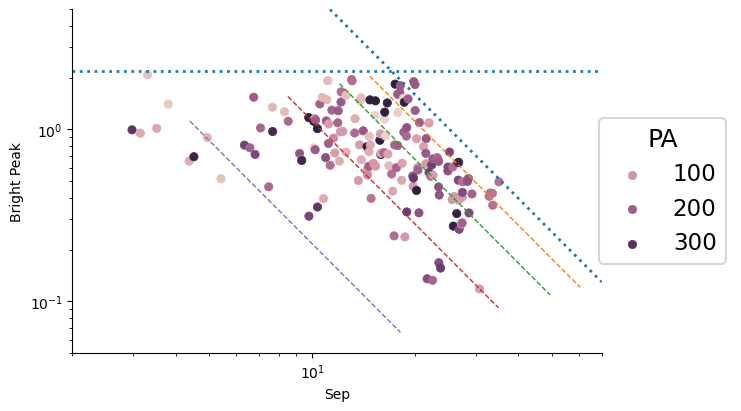

In [139]:
fig, ax = plt.subplots(figsize=(6, 4))
g = (
    so.Plot(table.to_pandas(), x="Sep", y="Bright Peak")
    .on(ax)
    .add(so.Dot(), color="PA")
    .scale(x="log", y="log")
    .limit(x=(2, 70.0), y=(0.05, 5.0))
    .layout(engine="constrained")
    .plot()
)
bmax = 2.2
rmin, rmax = 17.0, 70.0
ax.axhline(bmax, lw=2, ls=":")
ax.plot([rmin/3, rmax], [bmax * 3**2, bmax * (rmin/rmax)**2], lw=2, ls=":")
for i in 30, 45, 60, 75:
    cosi = np.cos(i * u.deg)
    ax.plot([cosi * rmin, cosi * rmax], [np.sqrt(cosi) * bmax, np.sqrt(cosi) * bmax * (rmin/rmax)**2], lw=1, ls="--")
sns.despine()
...;

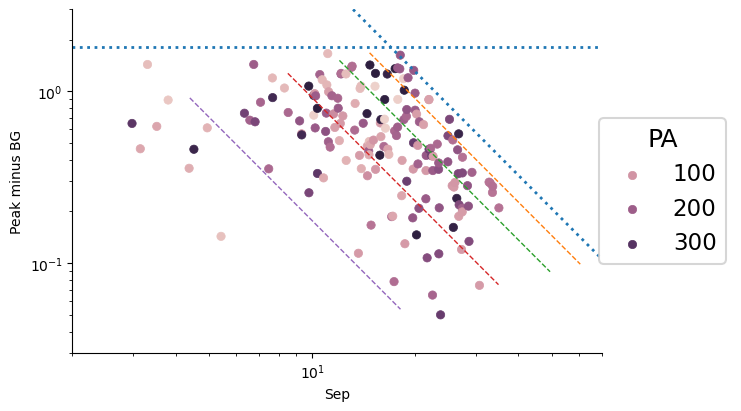

In [167]:
fig, ax = plt.subplots(figsize=(6, 4))
g = (
    so.Plot(table.to_pandas(), x="Sep", y="Peak minus BG")
    .on(ax)
    .add(so.Dot(), color="PA")
    .scale(x="log", y="log")
    .limit(x=(2, 70.0), y=(0.03, 3.0))
    .layout(engine="constrained")
    .plot()
)
bmax = 1.8
rmin, rmax = 17.0, 70.0
ax.axhline(bmax, lw=2, ls=":")
ax.plot([rmin/3, rmax], [bmax * 3**2, bmax * (rmin/rmax)**2], lw=2, ls=":")
for i in 30, 45, 60, 75:
    cosi = np.cos(i * u.deg)
    ax.plot([cosi * rmin, cosi * rmax], [np.sqrt(cosi) * bmax, np.sqrt(cosi) * bmax * (rmin/rmax)**2], lw=1, ls="--")
sns.despine()
...;

This shows that the max brightness envelope is roughly constant for projected separations less than about 20 arcsec, and thereafter falls like $r^{-2}$ (blue dotted lines). But only about 0.3 decades in radius. 

The dashed lines show effects of varying the inclination $|i|$ to 30, 45, 60, 75 deg. Effects on both the separation and the brightness (assuming a $\cos^{1/2} i$ dependence). Of course, for high inclination, this will bottom out for face-on globules ($i < 0$) as we will see the apex region with no limb-brightening as a floor on the max brightness. But for tail-on globules ($i > 0$), we will only see the limb-brightened rim, so the $\cos^{1/2} i$ behavior will continue indefinitely. 

So, it looks like we should be able to derive the inclination of individual knots from this diagram. 

- [ ] And compare them with the kinematics-derived inclinations
- [ ] We should do simple models of the brightness profiles
- [ ] And we should color according to the spatial groups
- [ ] We need to work out the theoretical curves for the peak brightnesses. This might be best done by expressing the brightness in terms of the mean surface brightness of the nebula, and the separations in terms of the Stromgren radius. That would avoid having to know the distance to the nebula or the ionizing luminosity, but it does assume that the diffuse nebula is ionization bounded in at least some directions, so we can know the Stromgren radius. 

There are two more factors that might reduce the brightnesses and so complicate the assignment of inclination based on this diagram. 

1. Small globules will have the peak reduced by the psf (beam dilution). 
2. Globules in a group that are slightly further from the star may be shadowed by those that are closer in.

Both these could be ameliorated by considering a subset of knots that are large and at the forefront of their respective group. 

***Actually, all this is flawed because I have not subtracted the BG brightness*** Although now I have corrected that and it does not make a lot of difference


In [76]:
(
    so.Plot(table.to_pandas(), x="Core Flux", y="Bright Peak")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit())
    .layout(size=(8, 6), engine="constrained")
)

In [54]:
(
    so.Plot(table.to_pandas(), x="Bright BG", y="Bright Peak", color="PA", pointsize="Sep")
    .add(so.Dot())
    .layout(size=(8, 6), engine="constrained")
)

In [151]:
prefix = "combo-D-neutral"
ntable = QTable.read(datapath / f"{prefix}-knot-fluxes.ecsv")

In [152]:
ntable

label,Center,Peak,PA,Sep,Core Flux,Halo Flux,Bright Peak,Bright BG,Isolated
,"deg,deg","deg,deg",deg,arcsec,,,,,
str10,SkyCoord,SkyCoord,float64,float64,float32,float32,float32,float64,bool
PA296-R030,"287.87784036028,16.860945805115154","287.87784467186157,16.860947203519856",296.28153574111286,2.9841626738870715,4292.598,32405.334,15.437284,-26.443044281005857,False
PA067-R032,"287.8794806112479,16.860921375900286","287.87948229283637,16.860921370043755",66.86947493936553,3.1549125149909147,942.0831,3269.2686,13.002155,1.5185136795043945,False
PA031-R033,"287.8791668960648,16.86142106681234","287.87916736712566,16.861420815524625",30.919260644413303,3.3108251070294017,3956.8232,5154.5166,43.19102,1.4342303276062012,False
PA072-R035,"287.87964205244964,16.86086579940732","287.8796442550666,16.86086970265695",71.97437921876036,3.5235564474513,662.4802,3671.579,13.036831,2.670292901992798,False
PA017-R038,"287.87896087796923,16.861611185199987","287.8789604148071,16.861610260388524",16.829907671084754,3.803227856282498,877.13586,5405.0303,16.793507,2.980067014694214,False
PA058-R044,"287.8797735225772,16.8612674337236","287.8797702282245,16.861265813119978",57.69177263933969,4.378772881478465,258.81845,3227.1475,5.5152626,1.6557819366455078,False
...,...,...,...,...,...,...,...,...,...
PA190-R293,"287.8770775093007,16.852573652937206","287.8770799181399,16.85257719919138",190.4969656328342,29.288811227632436,176.64145,349.58884,2.3447313,-0.10130083560943604,False


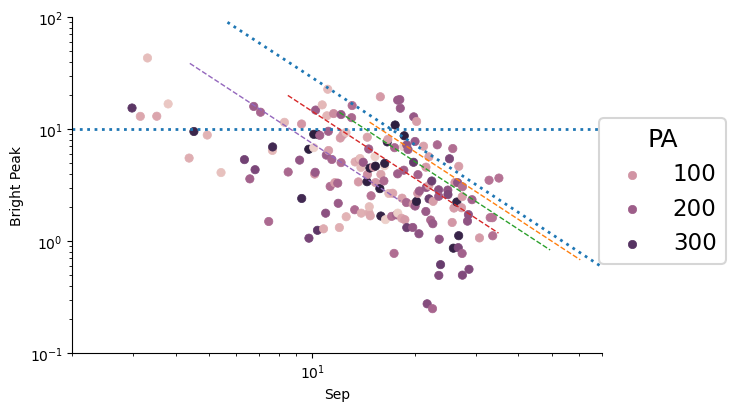

In [158]:
fig, ax = plt.subplots(figsize=(6, 4))
g = (
    so.Plot(ntable.to_pandas(), x="Sep", y="Bright Peak")
    .on(ax)
    .add(so.Dot(), color="PA")
    .scale(x="log", y="log")
    .limit(x=(2, 70.0), y=(0.1, 100.0))
    .layout(engine="constrained")
    .plot()
)
bmax = 10
power_law = 2
rmin, rmax = 17.0, 70.0
ax.axhline(bmax, lw=2, ls=":")
ax.plot([rmin/3, rmax], [bmax * 3**power_law, bmax * (rmin/rmax)**power_law], lw=2, ls=":")
for i in 30, 45, 60, 75:
    cosi = np.cos(i * u.deg)
    ax.plot([cosi * rmin, cosi * rmax], [bmax/cosi, (bmax/cosi) * (rmin/rmax)**power_law], lw=1, ls="--")
sns.despine()
...;

With the neutral emission, the variation with inclination ahould be very diffferent. If the knots have long tails, then the path length through the tail should increase as $1/\cos i$.  Although this would saturate for high inclinations when you run out of tail. And also would be lessened by the fact that the heads are brighter than the tails. 

So, if all the globules were at the same radius, then this would give brightness going as projected radius as $1/R$, which is more or less what we see for the general trend. 

However, this is completely inconsistent with the good positive correlation between PAH and Ha brightness. It would predict a **negative** correlation, so it cannot be the dominant effect. 

In [63]:
(
    so.Plot(ntable.to_pandas(), x="Core Flux", y="Bright Peak", color="PA", pointsize="Sep")
    .add(so.Dot())
    .layout(size=(8, 6), engine="constrained")
)

In [172]:
ntable.remove_columns("Center	Peak	PA	Sep	".split())

In [67]:
ntable

label,Core Flux,Halo Flux,Bright Peak,Bright BG,Isolated
str10,float32,float32,float32,float64,bool
PA296-R030,4292.598,32405.334,15.437284,-26.443044281005857,False
PA067-R032,942.0831,3269.2686,13.002155,1.5185136795043945,False
PA031-R033,3956.8232,5154.5166,43.19102,1.4342303276062012,False
PA072-R035,662.4802,3671.579,13.036831,2.670292901992798,False
PA017-R038,877.13586,5405.0303,16.793507,2.980067014694214,False
PA058-R044,258.81845,3227.1475,5.5152626,1.6557819366455078,False
...,...,...,...,...,...
PA190-R293,176.64145,349.58884,2.3447313,-0.10130083560943604,False
PA089-R308,44.221092,164.28812,1.0684156,0.43085445165634156,False


In [140]:
etable = QTable.read(datapath / f"{prefix}-knot-ellipses.ecsv")
etable

label,Ellipse Center,Ellipse Sigma X,Ellipse Sigma Y,Ellipse Theta,Ellipse Bright Peak,Ellipse Bright BG
,"deg,deg",arcsec,arcsec,,,
str10,SkyCoord,float64,float64,float64,float64,float64
PA296-R030,"287.8777713881935,16.860884195975324",0.20108327565336576,0.3107066905139085,296.28153574111286,14.339393610587686,2.0143685001322207
PA067-R032,"287.8794706842278,16.860917018162965",0.10745028024995941,0.13869516381341646,66.86947493936553,7.31271181856516,4.6895565872774565
PA031-R033,"287.8791678584019,16.861422607329676",0.2318598156355636,0.13899863145449828,30.919260644413303,39.78644421970429,2.213151802478329
PA072-R035,"287.8796390884499,16.860859614589263",0.09937920535010776,0.10729032974997622,71.97437921876036,9.329776648656683,3.5910060497466914
PA017-R038,"287.8789614127626,16.86161224479076",0.12890287951487245,0.09674254401017067,16.829907671084754,13.225500796384908,3.113083810786399
PA058-R044,"287.8797856600657,16.86127122256821",0.08558883915047281,0.15951864318331427,57.69177263933969,3.4132420179975864,1.9712655992605885
...,...,...,...,...,...,...
PA190-R293,"287.8770743150854,16.852563826588646",0.1490102294968298,0.10699187797080575,190.4969656328342,1.9126185626809955,0.20802485131772236


In [173]:
df = join(join(table, ntable, keys="label", table_names=["ha", "pah"]), etable, keys="label").to_pandas()

In [174]:
df.columns

Index(['label', 'Center.ra', 'Center.dec', 'Peak.ra', 'Peak.dec', 'PA', 'Sep',
       'Core Flux_ha', 'Halo Flux_ha', 'Bright Peak_ha', 'Bright BG_ha',
       'Isolated_ha', 'Peak minus BG', 'Core Flux_pah', 'Halo Flux_pah',
       'Bright Peak_pah', 'Bright BG_pah', 'Isolated_pah', 'Ellipse Center.ra',
       'Ellipse Center.dec', 'Ellipse Sigma X', 'Ellipse Sigma Y',
       'Ellipse Theta', 'Ellipse Bright Peak', 'Ellipse Bright BG'],
      dtype='object')

In [181]:
interesting_columns = [	"Sep",	"Core Flux_ha", "Bright Peak_ha", "Core Flux_pah", "Bright Peak_pah", "Ellipse Sigma X", "Ellipse Bright Peak", "Peak minus BG"]
df[interesting_columns].describe()

,Sep,Core Flux_ha,Bright Peak_ha,Core Flux_pah,Bright Peak_pah,Ellipse Sigma X,Ellipse Bright Peak,Peak minus BG
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,16.980577,60.856544,0.839976,414.961761,5.459991,0.167395,4.907707,0.614514
std,7.119153,41.184425,0.440305,537.573364,5.431787,0.120110,5.614223,0.373401
min,2.984163,-2.010379,0.118216,1.506318,-0.028125,0.031000,0.122650,0.050098
25%,11.526683,31.964702,0.514462,121.975828,1.827866,0.109641,1.507538,0.334694
50%,16.476913,51.940453,0.728498,254.872787,3.626822,0.133674,2.993345,0.533293
75%,21.928783,81.060841,1.102405,505.878731,6.943931,0.186639,6.436595,0.853953
max,35.096394,192.994156,2.084701,4292.598145,43.191021,1.145234,39.786444,1.658387


In [182]:
cdf = df[interesting_columns].corr()
sol = (cdf.where(np.triu(np.ones(cdf.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False, key=np.abs))
sol.head(25)

Core Flux_ha         Peak minus BG          0.963613
Bright Peak_ha       Peak minus BG          0.949822
Core Flux_ha         Bright Peak_ha         0.907537
Core Flux_pah        Bright Peak_pah        0.879156
Bright Peak_pah      Ellipse Bright Peak    0.846112
Core Flux_pah        Ellipse Bright Peak    0.739807
Bright Peak_ha       Bright Peak_pah        0.684781
Bright Peak_pah      Peak minus BG          0.664758
Bright Peak_ha       Core Flux_pah          0.592862
Core Flux_ha         Bright Peak_pah        0.586564
Core Flux_pah        Peak minus BG          0.564348
Bright Peak_ha       Ellipse Bright Peak    0.544803
Ellipse Bright Peak  Peak minus BG          0.533560
Core Flux_ha         Core Flux_pah          0.506738
Sep                  Bright Peak_pah       -0.461112
                     Bright Peak_ha        -0.455923
Core Flux_ha         Ellipse Bright Peak    0.454601
Sep                  Peak minus BG         -0.446831
Ellipse Sigma X      Ellipse Bright Peak    0.

So the highest correlations are between the flux and the brightness, suggesting that there is very little variation in the sizes. 

However, this might be just because the core mask has a fixed small radius. Also, now that we have included the ellipse table, we see that there is a correlation between ellipse size and ellipse brightness, but strangely not between ellipse size and the pixel-derived Bright Peak_pah

In [147]:
(
    so.Plot(df, x="Bright Peak_ha", y="Bright Peak_pah")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit(order=1))
    .scale(x="log", y="log")
    .limit(x=(0.01, 25.0), y=(0.08, 200.0))
    .layout(size=(8, 8), engine="constrained")
)

In [180]:
(
    so.Plot(df, x="Peak minus BG", y="Bright Peak_pah")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit(order=1))
    .scale(x="log", y="log")
    .limit(x=(0.01, 25.0), y=(0.08, 200.0))
    .layout(size=(8, 8), engine="constrained")
)

This is the correlation between Ha peak brightness and neutral peak brightness, which is pretty tight. This is strong evidence that they are both varying due to the same cause, which is presumably incident radiation field strength, falling as $R^{-2}$ with true distance from the star. 

However, the relation is non-linear, with a variation of nearly two orders of magnitude in PAH, but only just over an order of magnitude in H alpha.

In [92]:
(
    so.Plot(df, x="Core Flux_ha", y="Core Flux_pah")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit(order=1))
    .scale(x="log", y="log")
    .limit(x=(0.8, 2000), y=(5.0, 12500))
    .layout(size=(8, 8), engine="constrained")
)

In [149]:
(
    so.Plot(df, x="Ellipse Bright Peak", y="Bright Peak_pah")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit(order=1))
    .scale(x="log", y="log")
    .limit(x=(0.08, 200.0), y=(0.08, 200.0))
    .layout(size=(8, 8), engine="constrained")
)

In [150]:
(
    so.Plot(df, x="Ellipse Bright Peak", y="Ellipse Sigma X")
    .add(so.Dot(), color="PA", pointsize="Sep")
    .add(so.Line(), so.PolyFit(order=1))
    .scale(x="log", y="log")
    .limit(x=(0.08, 200.0), y=(None, None))
    .layout(size=(8, 8), engine="constrained")
)

In [163]:
table.show_in_notebook()

idx,label,Center,Peak,PA,Sep,Core Flux,Halo Flux,Bright Peak,Bright BG,Isolated,Peak minus BG
,,"deg,deg","deg,deg",deg,arcsec,,,,,,
0,PA296-R030,"287.87789578469875,16.86096204177071","287.877898659302,16.860964425944477",296.28153574111286,2.9841626738870715,59.213135,142.35716,0.99528867,0.3447472006082535,False,0.6505414694547653
1,PA067-R032,"287.87949950442567,16.860935900613693","287.8795002887479,16.860938592192227",66.86947493936553,3.1549125149909147,25.638582,444.40985,0.95200294,0.48857472836971283,False,0.46342821419239044
2,PA031-R033,"287.8791458692158,16.861382097170157","287.8791493711526,16.861386371124887",30.919260644413303,3.3108251070294017,96.54263,340.75208,2.0847006,0.6514793634414673,False,1.4332212209701538
3,PA072-R035,"287.87964489715415,16.86087799578421","287.87964425511205,16.860878313768055",71.97437921876036,3.5235564474513,56.315887,391.88873,1.0158854,0.3904679656028748,False,0.6254173874855041
4,PA017-R038,"287.8789775303131,16.86161069339155","287.8789784107064,16.861610260360283",16.829907671084754,3.803227856282498,74.60344,776.0485,1.4058148,0.5156514644622803,False,0.8901633024215698
5,PA058-R044,"287.8797736016353,16.86127178513465","287.8797702282758,16.86127442423109",57.69177263933969,4.378772881478465,22.07224,404.77368,0.6536312,0.29681635499000547,False,0.35681485533714297
6,PA338-R045,"287.8781141762508,16.861719341865673","287.87813260311395,16.86173081554707",337.92334456075815,4.521866041533656,15.971296,137.45193,0.69413847,0.2338367372751236,True,0.4603017300367355
7,PA050-R049,"287.8797596952389,16.861490553950446","287.87976123161263,16.861489702057614",49.97813143674663,4.9470357908001645,58.65014,358.8886,0.8987521,0.2854198753833771,False,0.6133322179317474
8,PA028-R054,"287.87938434204057,16.861935937705297","287.87938331971685,16.861937481532077",28.041795442239398,5.4263621184941275,-2.0103788,573.3223,0.51681226,0.37345460057258606,False,0.14335766434669495


In [161]:
etable.show_in_notebook()

idx,label,Ellipse Center,Ellipse Sigma X,Ellipse Sigma Y,Ellipse Theta,Ellipse Bright Peak,Ellipse Bright BG
,,"deg,deg",arcsec,arcsec,,,
0,PA296-R030,"287.8777713881935,16.860884195975324",0.20108327565336576,0.3107066905139085,296.28153574111286,14.339393610587686,2.0143685001322207
1,PA067-R032,"287.8794706842278,16.860917018162965",0.10745028024995941,0.13869516381341646,66.86947493936553,7.31271181856516,4.6895565872774565
2,PA031-R033,"287.8791678584019,16.861422607329676",0.2318598156355636,0.13899863145449828,30.919260644413303,39.78644421970429,2.213151802478329
3,PA072-R035,"287.8796390884499,16.860859614589263",0.09937920535010776,0.10729032974997622,71.97437921876036,9.329776648656683,3.5910060497466914
4,PA017-R038,"287.8789614127626,16.86161224479076",0.12890287951487245,0.09674254401017067,16.829907671084754,13.225500796384908,3.113083810786399
5,PA058-R044,"287.8797856600657,16.86127122256821",0.08558883915047281,0.15951864318331427,57.69177263933969,3.4132420179975864,1.9712655992605885
6,PA338-R045,"287.8780414797211,16.86174332785349",0.681458113261811,0.5183712850276296,337.92334456075815,24.966966536416614,-19.23562431335449
7,PA050-R049,"287.8797307246043,16.861504049133824",0.11262683986839299,0.1630615799278011,49.97813143674663,5.732479247124745,1.7177272897691445
8,PA028-R054,"287.87937446052337,16.861942866912045",0.107094016434982,0.12067666457324272,28.041795442239398,2.571827743827694,1.161719282534513
